### Student Performance 

#### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### Variables:
Hours Studied: The total number of hours spent studying by each student.

Previous Scores: The scores obtained by students in previous tests.

Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).

Sleep Hours: The average number of hours of sleep the student had per day.

Sample Question Papers Practiced: The number of sample question papers the student practiced.

#### Target Variable:
Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

#### Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Student_Performance.csv') ## Kaggle dataset
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 429.8+ KB


In [6]:
df.shape

(10000, 6)

In [7]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [8]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


#### Exploratory Data Analysis

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


[]

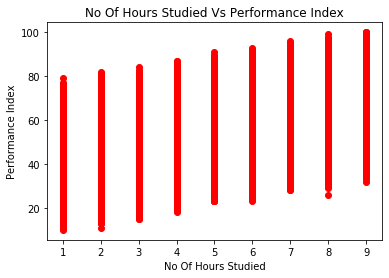

In [13]:
plt.scatter(df['Hours Studied'],df['Performance Index'],color='red')
plt.xlabel('No Of Hours Studied')
plt.ylabel('Performance Index')
plt.title('No Of Hours Studied Vs Performance Index')
plt.plot()

In [ ]:
## There is a correlation b/w hours studied and performance index

[]

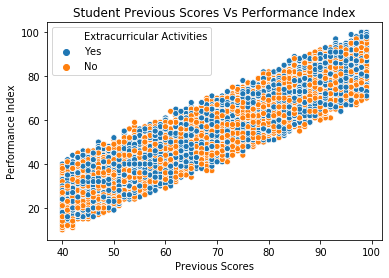

In [20]:
sns.scatterplot(x=df['Previous Scores'],y=df['Performance Index'],hue=df['Extracurricular Activities'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Student Previous Scores Vs Performance Index')
plt.plot()

In [21]:
## Student Previous and Performance index are highly correlated

[]

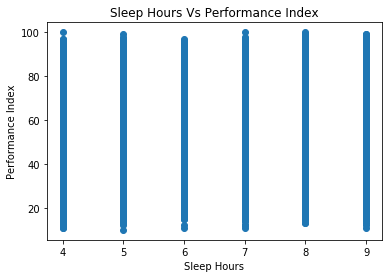

In [22]:
plt.scatter(df['Sleep Hours'],df['Performance Index'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Sleep Hours Vs Performance Index')
plt.plot()

In [23]:
## There is no relation b/w Sleep Hours and Performance index

[]

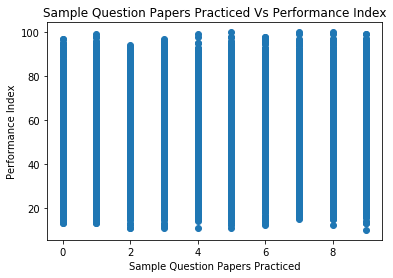

In [24]:
plt.scatter(df['Sample Question Papers Practiced'],df['Performance Index'])
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Sample Question Papers Practiced Vs Performance Index')
plt.plot()

In [25]:
## Also There is no clear relation b/w Sleep Hours and Performance index

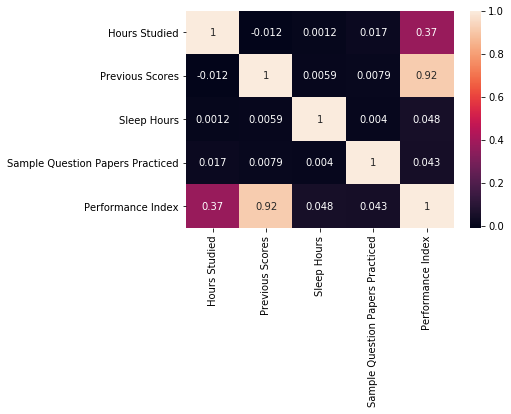

In [26]:
sns.heatmap(df.drop('Extracurricular Activities',axis=1).corr(),annot=True)

we can drop Sleep hours and Sample Question Papers practised columns as they are weakly correlated with our target variable Performance index

#### Model Creation

In [29]:
df.drop(columns=['Sample Question Papers Practiced'],axis=1,inplace=True)

In [30]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Performance Index
0,7,99,Yes,9,91.0
1,4,82,No,4,65.0
2,8,51,Yes,7,45.0
3,5,52,Yes,5,36.0
4,7,75,No,8,66.0


#### One Hot Encoding 

In [34]:
df=pd.get_dummies(df,columns=['Extracurricular Activities'],drop_first=True)

In [35]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Performance Index,Extracurricular Activities_Yes
0,7,99,9,91.0,1
1,4,82,4,65.0,0
2,8,51,7,45.0,1
3,5,52,5,36.0,1
4,7,75,8,66.0,0


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
X=df[['Hours Studied','Previous Scores','Sleep Hours','Extracurricular Activities_Yes']]
y=df['Performance Index']

In [40]:
X.head()

,Hours Studied,Previous Scores,Sleep Hours,Extracurricular Activities_Yes
0,7,99,9,1
1,4,82,4,0
2,8,51,7,1
3,5,52,5,1
4,7,75,8,0


In [48]:
## train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
X_train.shape,X_test.shape

((7000, 4), (3000, 4))

In [44]:
## Standardization
scaler=StandardScaler()

In [50]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
pd.DataFrame(X_train,columns=['Hours Studied','Previous Scores','Sleep Hours','Extracurricular Activities_Yes']).head()

,Hours Studied,Previous Scores,Sleep Hours,Extracurricular Activities_Yes
0,-0.379217,1.695434,-0.319443,1.019621
1,0.391102,1.176378,1.448690,1.019621
2,1.161422,-0.726827,-0.319443,-0.980757
3,0.391102,1.291724,0.859313,1.019621
4,0.391102,-0.323116,0.859313,1.019621


In [52]:
## Create Linear Model
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# intercept
regressor.intercept_

55.39971428571428

In [54]:
# Coefficients
regressor.coef_

array([ 7.42866762, 17.61382152,  0.81368571,  0.28514602])

In [56]:
## HoursStd    Prev Score    Sleep Hrs    ExtraCurrAct
## 7.42866762, 17.61382152,  0.81368571,  0.28514602

In [57]:
# Test Prediction
y_pred=regressor.predict(X_test)

In [58]:
pd.DataFrame({
        'Actual':y_test,
        'Predicted':y_pred
    }).head()

,Actual,Predicted
6252,51.0,55.251294
4684,20.0,21.955435
1731,46.0,47.858656
4742,28.0,31.255244
4521,41.0,42.802033


In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [61]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.mean(mse)
print(mse)
print(mae)
print(rmse)

4.402288470739066
1.676355999014611
4.402288470739066


In [62]:
## Test Pred Score
rscore=r2_score(y_test,y_pred)
rscore

0.9881038432275115

In [78]:
## Train Prediction
X_pred=regressor.predict(X_train)

In [80]:
## Train Pred score
print(r2_score(y_train,X_pred))

0.9878136474598966


#### Predictions

In [72]:
## HoursStd    Prev Score    Sleep Hrs    ExtraCurrAct
data_to_pred=[10,99,4,1]  ##98.68473412
data_to_pred1=[10,99,4,0] ##98.11433443
pred1=scaler.transform([data_to_pred])
regressor.predict(pred1)

array([98.68473412])

In [81]:
data_to_pred=[4,65,6,1]  
data_to_pred1=[4,65,6,0] 
pred1=scaler.transform([data_to_pred])
regressor.predict(pred1)

array([47.93797478])

In [82]:
residuals=y_test-y_pred
residuals

6252   -4.251294
4684   -1.955435
1731   -1.858656
4742   -3.255244
4521   -1.802033
          ...   
8014    0.265188
1074    2.954503
3063   -0.529922
6487    1.151909
4705   -2.311947
Name: Performance Index, Length: 3000, dtype: float64

In [83]:
np.mean(residuals)

-0.12165274301780155

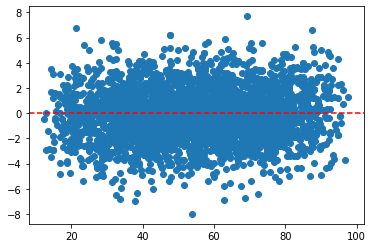

In [85]:
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.show()

In [87]:
## Model Fit:Suggesting a good fit [Very Close to Actual data]
## mean of residuals almost zero